### DISEASE MODEL FOR  ACUTE HEPATITIS B

After 365 days:
Susceptible: 18300372
Exposed: 1892766
Infectious: 4037070
Recovered: 9249793


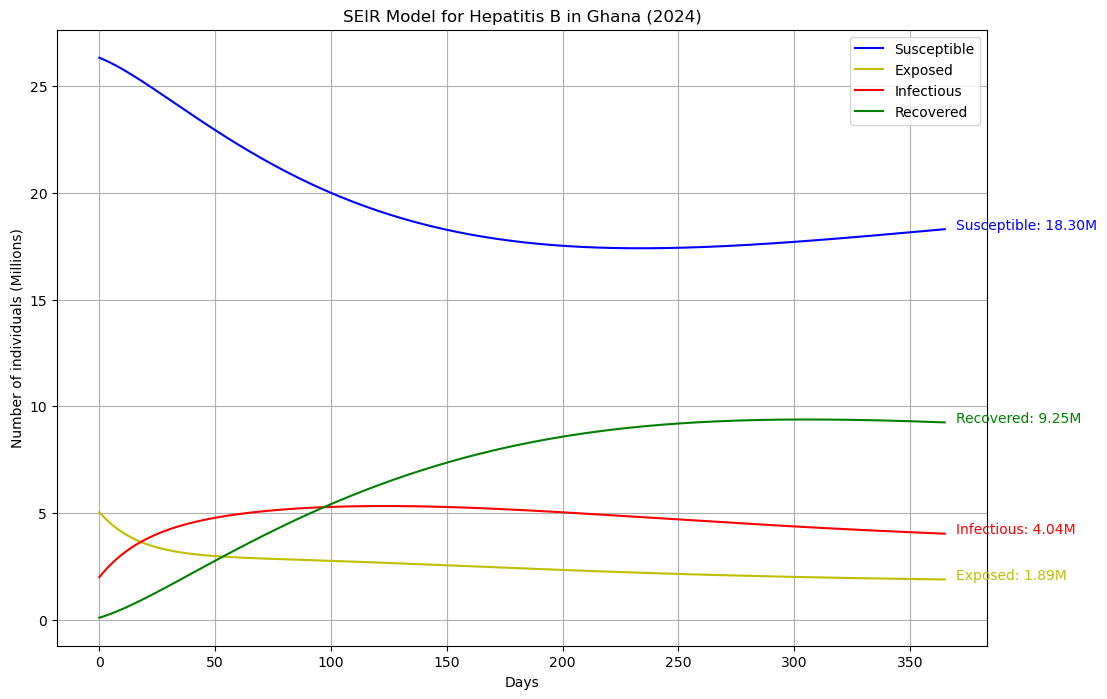

In [177]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the SEIR model for Hepatitis B in Ghana
def seir_model(y, t, N, beta, sigma, gamma, mu, nu, omega):
    S, E, I, R = y
    dSdt = nu * N - beta * S * I / N - mu * S + omega * R
    dEdt = beta * S * I / N - sigma * E - mu * E
    dIdt = sigma * E - gamma * I - mu * I
    dRdt = gamma * I - mu * R - omega * R
    return dSdt, dEdt, dIdt, dRdt

# Set parameters
# Prevalence rate of Hepatitis B is 9.1%
N = 33480000  # Total population of Ghana (2024 estimate)
I0 = 2000000  # Initial number of infectious individuals (estimate)
E0 = 5046680  # Initial number of exposed individuals (estimate)
R0 = 100000  # Initial number of recovered individuals (estimate)
S0 = N - I0 - E0 - R0  # Initial number of susceptible individuals

beta = 0.028  # Transmission rate
sigma = 1/30  # Incubation rate (1/average incubation period)
gamma = 3/180  # Recovery rate (1/average infectious period)
mu = 1/(70*365)  # Natural death rate (1/average lifespan in days)
nu = 1/(70*365)  # Birth rate (assumed equal to death rate for simplicity)
omega = 28/(10*365)  # Rate of loss of immunity (1/average immunity duration)

# Initial conditions vector
y0 = S0, E0, I0, R0

# Time vector (365 days for 2024)
t = np.linspace(0, 365, 365)

# Solve the ODE
solution = odeint(seir_model, y0, t, args=(N, beta, sigma, gamma, mu, nu, omega))
S, E, I, R = solution.T

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t, S/1e6, 'b', label='Susceptible')
plt.plot(t, E/1e6, 'y', label='Exposed')
plt.plot(t, I/1e6, 'r', label='Infectious')
plt.plot(t, R/1e6, 'g', label='Recovered')
plt.xlabel('Days')
plt.ylabel('Number of individuals (Millions)')
plt.title('SEIR Model for Hepatitis B in Ghana (2024)')
plt.legend()
plt.grid(True)

# Calculate and print final values
final_S = S[-1]
final_E = E[-1]
final_I = I[-1]
final_R = R[-1]

print(f"After 365 days:")
print(f"Susceptible: {final_S:.0f}")
print(f"Exposed: {final_E:.0f}")
print(f"Infectious: {final_I:.0f}")
print(f"Recovered: {final_R:.0f}")

# Add statistics to the plot
plt.text(370, final_S/1e6, f'Susceptible: {final_S/1e6:.2f}M', color='b')
plt.text(370, final_E/1e6, f'Exposed: {final_E/1e6:.2f}M', color='y')
plt.text(370, final_I/1e6, f'Infectious: {final_I/1e6:.2f}M', color='r')
plt.text(370, final_R/1e6, f'Recovered: {final_R/1e6:.2f}M', color='g')

# Save and show the plot
plt.savefig('SEIR_Model_for_Hepatitis_B.jpeg')
plt.show()
